In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
df = pd.DataFrame(data=iris.get('data'), columns=iris.get('feature_names'))

In [5]:
df['target'] = iris.get('target').tolist()
df.rename({'sepal length (cm)': 'sep_len', 
           'sepal width (cm)': 'sep_wid', 
           'petal length (cm)': 'pet_len', 
           'petal width (cm)': 'pet_wid'}, axis=1, inplace=True)

In [6]:
df.head()

,sep_len,sep_wid,pet_len,pet_wid,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Analyse with pandas

In [7]:
ser = df[df.target==1].sep_wid

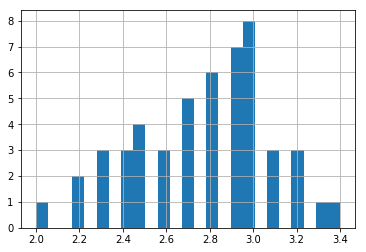

In [8]:
# hist
ser.hist(bins=25)

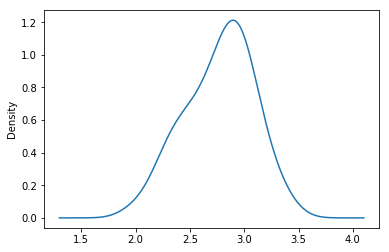

In [9]:
# pdf
ser.plot.kde()

The PDF is the derivative of the CDF.<br>
The yaxis is the relative density - you might think its odd it goes over 1, but the integral must equal 1. This is why it gives a **relative** density.

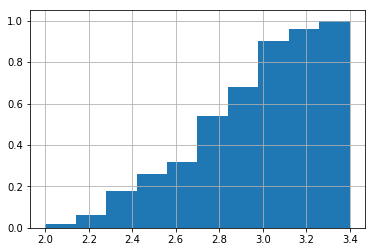

In [10]:
# cdf
ser.hist(cumulative=True, density=1)

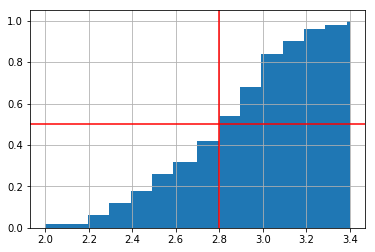

In [11]:
# so the 50th percentile - i.e. the median is
ser.hist(cumulative=True, density=1, bins=100)
plt.axhline(0.5, c='r')
plt.axvline(ser.quantile(0.5), c='r')

So I guess the x-axis of a CDF can represent both the values themselves, and the quantiles.

# With seaborn

In [12]:
df.head()

,sep_len,sep_wid,pet_len,pet_wid,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


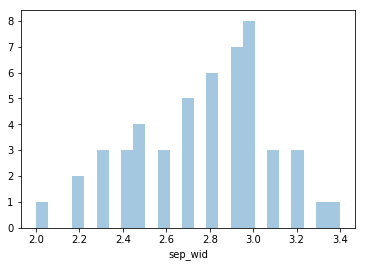

In [13]:
# hist
sns.distplot(ser, kde=False, bins=25)

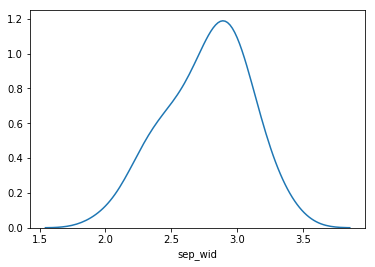

In [14]:
# pdf
sns.distplot(ser, hist=False)

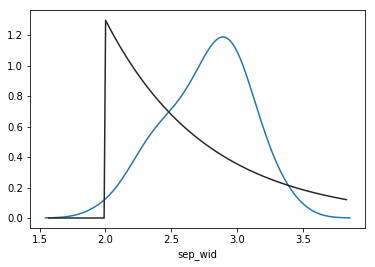

In [15]:
# we can also try to fit distributions over the PDF with seaborn:
sns.distplot(ser, hist=False, fit=stats.expon)

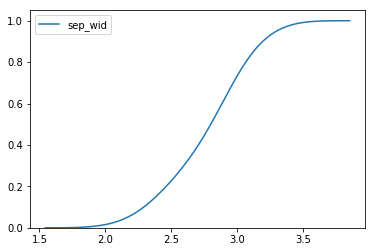

In [16]:
# cdf
sns.kdeplot(ser, cumulative=True)
# no cdf function in seaborn!?!?!

# The above CDF's aren't what are known as percentile-plots, these have the actual feature values on the y-axis, i.e.:

There is another package called probscale which has some good plots:

In [17]:
!pip install probscale

You are using pip version 9.0.3, however version 19.2.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [19]:
import probscale

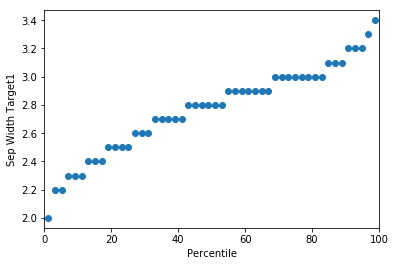

In [58]:
probscale.probplot( ser, plottype='pp', problabel='Percentile', 
                   datalabel='Sep Width Target1',
                   linestyle='-')

plt.show()

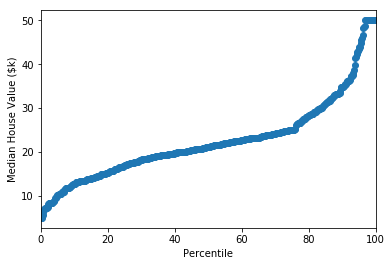

In [76]:
# another example with more data
boston = datasets.load_boston()
probscale.probplot( boston.target, plottype='pp', problabel='Percentile', 
                   datalabel='Median House Value ($k)',
                   linestyle='-')

plt.show()

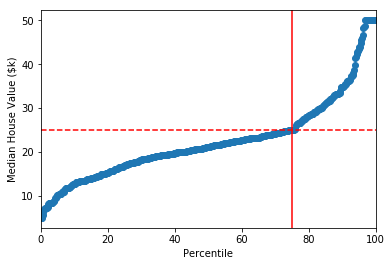

In [85]:
percentile75 = pd.Series(boston.target).quantile(0.75)

probscale.probplot( boston.target, plottype='pp', problabel='Percentile', 
                   datalabel='Median House Value ($k)',
                   linestyle='-')

plt.axvline(75, c='r')
plt.axhline(percentile75, c='r', ls='--')

plt.show()